Here, I have set up a plotting format that might be nice to implement for all the plots in the paper. I show how one can load the plotting params dictionary, and create some example figures.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
import pandas as pd
%matplotlib inline

### plot format

In [2]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True

# "load" the format params in
for key in rcparams: mpl.rcParams[key] = rcparams[key]

### read in the all-metrics file

In [3]:
outdir = '/global/homes/a/awan/LSST/lsstRepos/ObsStrat/postwp/summary_csv/'
all_metrics = pd.read_csv('%s/all_metrics_dec_2.csv' % (outdir))

### example plot for some dbs (rather randomly chosen)

In [4]:
chosen_for_now = ['baseline_v1.3_10yrs.db',
                  'dcr_nham3_v1.3_10yrs.db',
                  'altLike_large_v1.3_10yrs.db',
                  'bulges_bsv1.3_10yrs.db',
                  'filterload_illum10_v1.3_10yrs.db',
                  'big_sky_dust_v1.3_10yrs.db',
                  'presto_v1.3_10yrs.db',
                  'altroll_mod2_sdf_0.20_v1.3_10yrs.db',
                  'delayedrolling_mod2_sdf_0.10_v1.3_10yrs.db',
                  'simplerolling_mod10_sdf_0.20_v1.3_10yrs.db'
                 ]

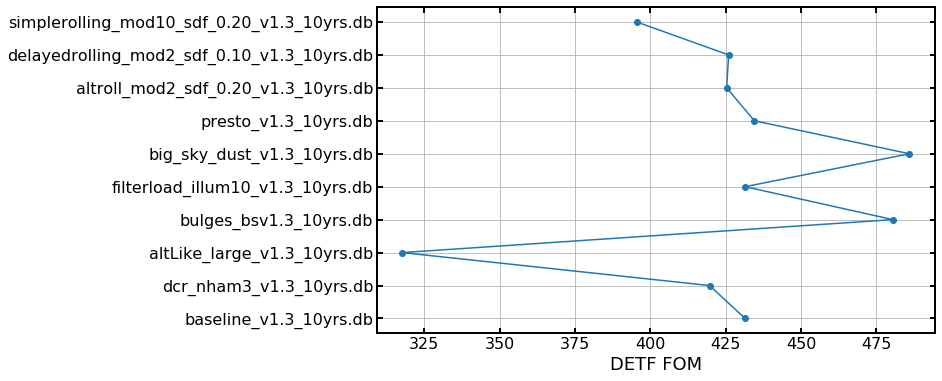

In [5]:
ndbs = len( chosen_for_now )

# find the indices for the chosen dbs
inds = []
for db in chosen_for_now:
    inds.append( np.where( all_metrics['name'] == db)[0][0] )

inds = np.array(inds)
    
plt.clf()
ax = plt.axes()
ax.plot(all_metrics['wl_fom'].values[inds], range( ndbs ), 'o-' )
ax.set_yticks( range( ndbs ) )
ax.set_yticklabels( all_metrics['name'].values[inds] ) #rotation=90)
    
plt.xlabel('DETF FOM')

filename = 'plt_detf-fom_%snewdbs.png' % ndbs
#plt.savefig('%s/%s'%(outdir, filename), format= 'png', bbox_inches='tight')
plt.show()

### example plot for all dbs

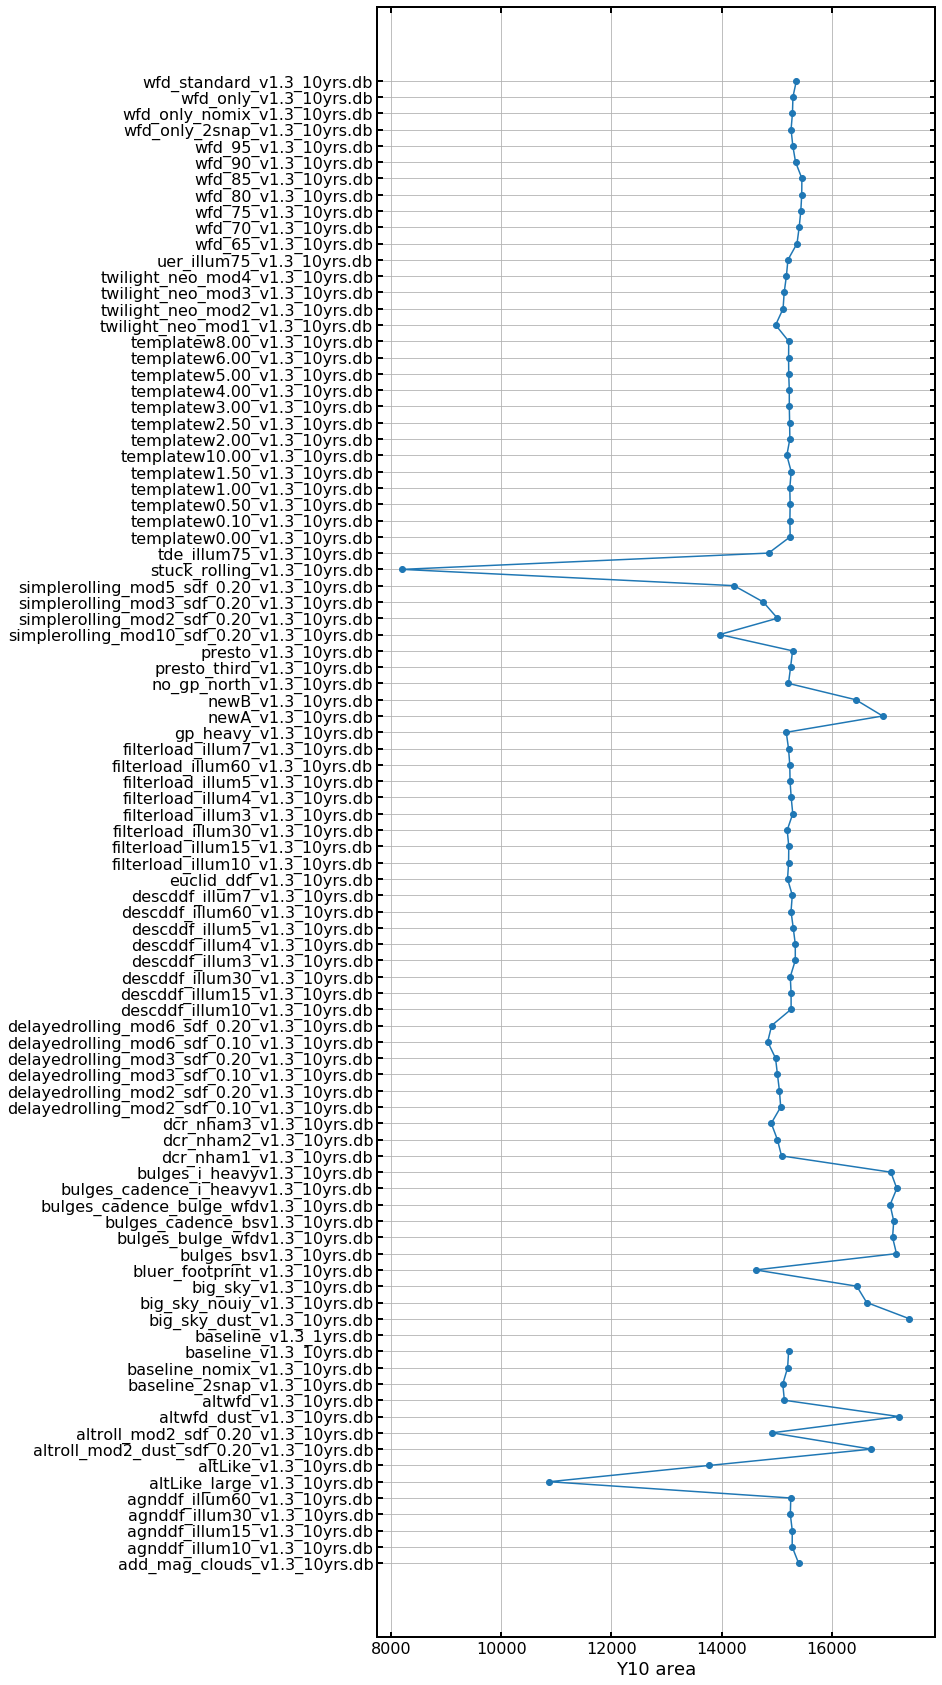

In [8]:
ndbs = len(all_metrics['name'])
plt.clf()
ax = plt.axes()
ax.plot(all_metrics['lss_Y10 effective survey area'], range( ndbs ), 'o-' )
ax.set_yticks( range( ndbs ) )
ax.set_yticklabels( all_metrics['name'] ) #rotation=90)
    
plt.xlabel('Y10 area')
plt.gcf().set_size_inches(10, 30)
filename = 'plt_detf-fom_%snewdbs.png' % ndbs
#plt.savefig('%s/%s'%(outdir, filename), format= 'png', bbox_inches='tight')
plt.show()